In [ ]:
from sklearn.svm import SVC
import itertools
import numpy as np

def is_shattered(d, n, points):
    # Generate all possible labels for n points
    all_labels = [np.array(labels) for labels in itertools.product([0, 1], repeat=n)]

    # Initialize SVM with high C to ensure it behaves like a hard margin classifier
    svm = SVC(C=10000, kernel='linear', tol=1e-5, shrinking=False)

    # Check if every possible labeling can be learned by the SVM
    for labels in all_labels:
      if len(np.unique(labels)) > 1:
        # Fit SVM to the data
        svm.fit(points, labels)
        # Check if the SVM can separate the data perfectly
        if svm.score(points, labels) < 1:
            # If not, then the set is not shattered for this labeling
            return False

    # If the loop completes, then the set is shattered for all labelings
    return True

In [ ]:
is_shattered(2, 4, np.array([[0, 1], [1, 0], [0, 0], [1, 1]]))  # Example set in R^2

False

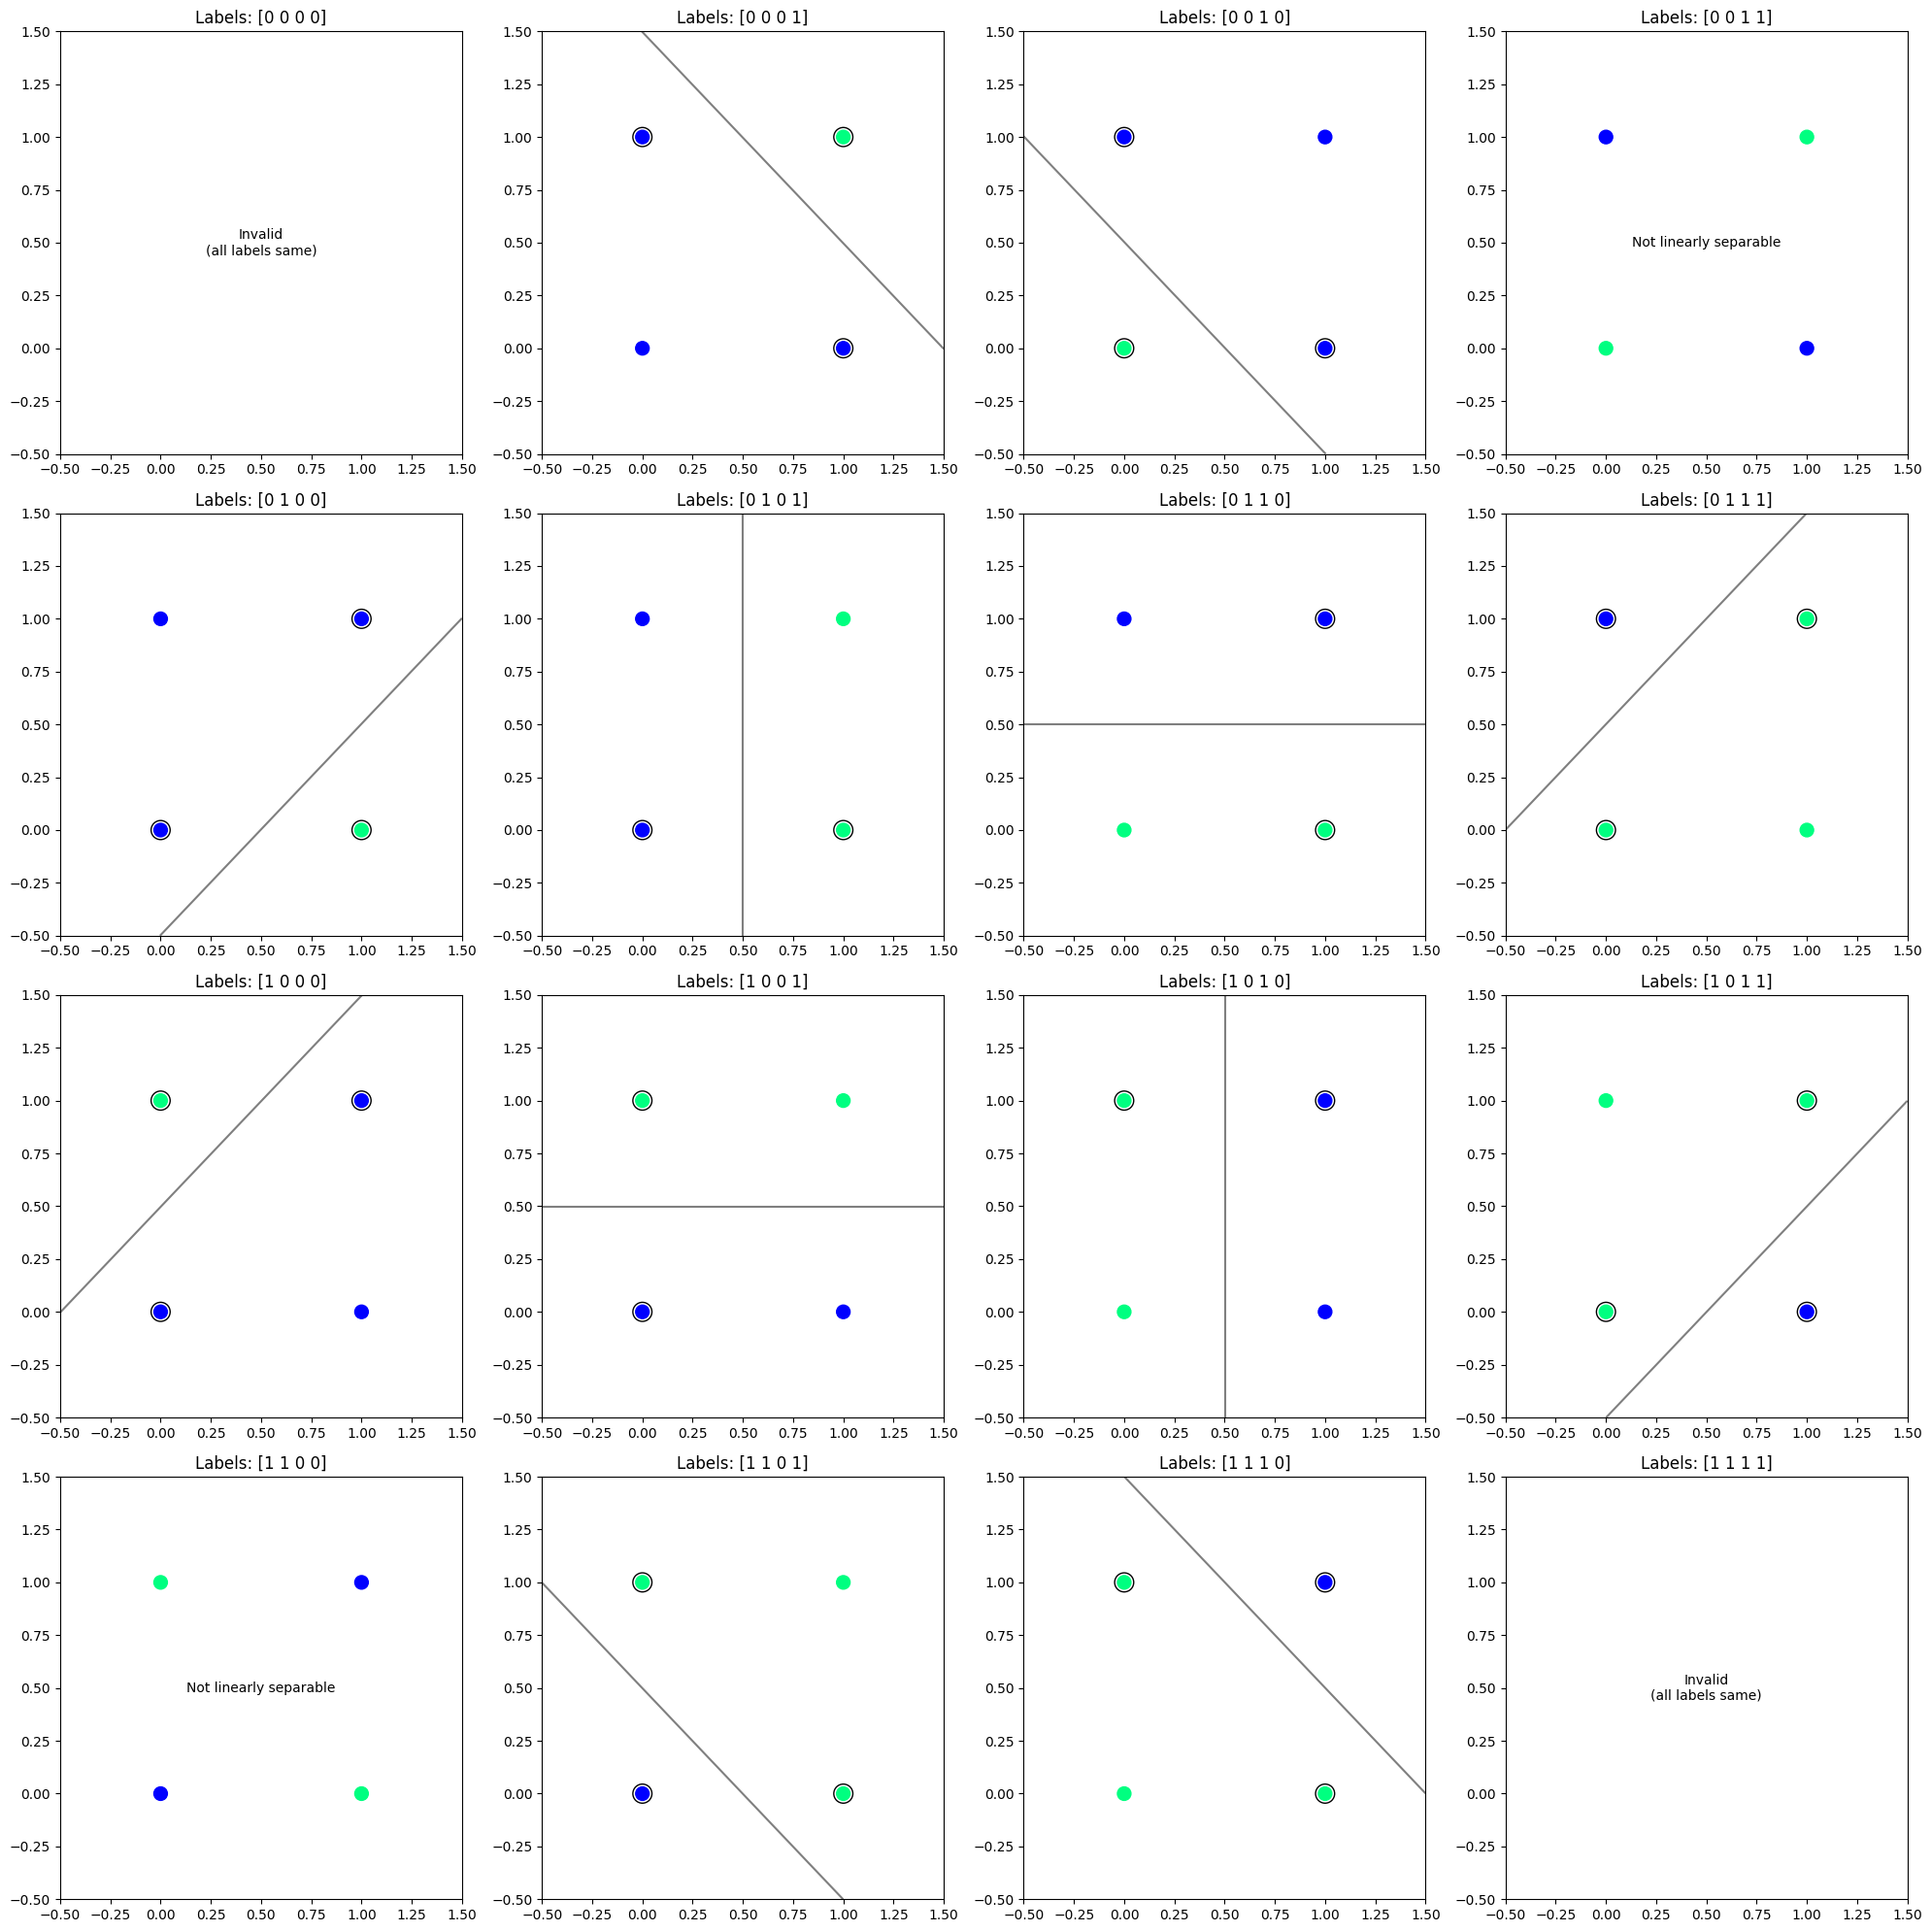

In [ ]:
import numpy as np
import itertools
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define a fixed set of four points in R^2
fixed_points = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])

# Generate all possible labels for 4 points
all_labels = [np.array(labels) for labels in itertools.product([0, 1], repeat=4)]

# Initialize SVM with parameters as per task requirements
svm = SVC(C=10000, kernel='linear', tol=1e-5, shrinking=False)

# Prepare plot with subplots for each labeling scenario
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # 16 subplots for 16 possible labelings

# Loop through all possible label configurations
for i, labels in enumerate(all_labels):
    ax = axs[i // 4, i % 4]  # Select subplot based on index

    # Check if there are at least two different classes in the labels
    if len(np.unique(labels)) > 1:  # Fix applied here
        svm.fit(fixed_points, labels)  # Fit SVM to data and labels
        ax.scatter(fixed_points[:, 0], fixed_points[:, 1], c=labels, s=100, cmap='winter')  # Plot points

        # Plot decision boundary if SVM successfully separates the classes
        if svm.score(fixed_points, labels) == 1:
            xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 500), np.linspace(-0.5, 1.5, 500))
            Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
            ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200,
                       linewidth=1, facecolors='none', edgecolors='k')  # Plot support vectors
        else:
            ax.text(0.5, 0.5, 'Not linearly separable', horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes)
    else:
        ax.text(0.5, 0.5, 'Invalid\n(all labels same)', horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes)  # Mark configurations with all same labels as invalid

    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([-0.5, 1.5])
    ax.set_title(f'Labels: {labels}')

plt.tight_layout()
plt.show()


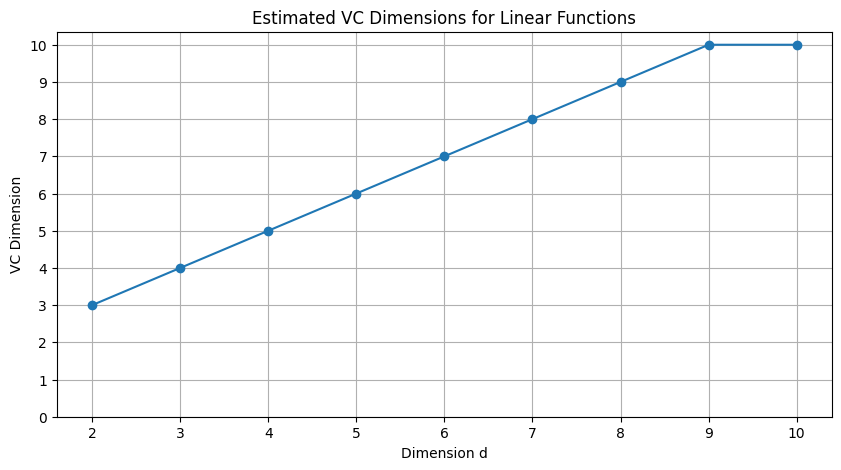

[(2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 10)]


In [1]:
import numpy as np
from sklearn.svm import SVC
import itertools
import matplotlib.pyplot as plt

# Function to check if a set of points is shattered
def is_shattered(d, n, points):
    all_labels = [np.array(labels) for labels in itertools.product([0, 1], repeat=n)]
    svm = SVC(C=10000, kernel='linear', tol=1e-5, shrinking=False)
    for labels in all_labels:
        try:
            svm.fit(points, labels)
            if svm.score(points, labels) < 1:
                return False
        except:
            continue
    return True

# Function to estimate VC dimensions for linear functions
def estimate_vc_dimension_for_linear_functions(d_max, n_max, num_samples):
    vc_dimensions = []
    for d in range(2, d_max + 1):  # Iterate through dimensions
        vc_dim = 0
        for n in range(1, n_max + 1):  # Iterate through number of points
            shattered_count = 0
            for _ in range(num_samples):  # Sample sets and check if shattered
                points = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
                if is_shattered(d, n, points):
                    shattered_count += 1
            if shattered_count > num_samples / 2:  # Majority is shattered
                vc_dim = n
            else:  # If not majority, break out, as we found VC dimension for this d
                break
        vc_dimensions.append((d, vc_dim))
    return vc_dimensions

# Parameters setting
d_max = 10  # Max dimension to test
n_max = 10  # Max number of points to test
num_samples = 30  # Number of sets Sn to sample for each n

# Estimate VC dimensions for linear functions
vc_dimensions_linear = estimate_vc_dimension_for_linear_functions(d_max, n_max, num_samples)

# Plotting the estimated VC dimensions
dimensions, vc_dims = zip(*vc_dimensions_linear)
plt.figure(figsize=(10, 5))
plt.plot(dimensions, vc_dims, marker='o')
plt.title('Estimated VC Dimensions for Linear Functions')
plt.xlabel('Dimension d')
plt.ylabel('VC Dimension')
plt.grid(True)
plt.xticks(range(2, d_max + 1))
plt.yticks(range(0, n_max + 1))
plt.show()

# Output the estimated VC dimensions
print(vc_dimensions_linear)
